## Lab2_LDA _ Поиск аномалий_ Понижение размерности


**Визуализация**  - первый шаг в решении практически любой задачи анализа данных.


Визуализация помогает решить, какую предобработку данных нужно провести, какие методы лучше использовать для предсказания, какие признаки добавить. 

Разведочный анализ данных (англ. exploratory data analysis, EDA) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Понятие введено математиком Джоном Тьюки, который сформулировал цели такого анализа следующим образом:

* максимальное «проникновение» в данные,
* выявление основных структур,
* выбор наиболее важных переменных,
* обнаружение отклонений и аномалий,
* проверка основных гипотез,
* разработка начальных моделей.


Будем работать с данными [kaggle-соревнования](https://www.kaggle.com/c/prudential-life-insurance-assessment)
 
 * dataset strahovanie.csv в папке datasets
 
 
 В этом наборе данных вам предоставлено более сотни переменных, описывающих атрибуты соискателей страхования жизни.

__Задача соревнования:__ по характеристикам человека и его заявки на медицинскую страховку предсказать степень риска, характерную для данной страховки.

__Чем будем заниматься:__
* рассматривать данные;
* пробовать разные методы визуализации;
* анализировать графики и пытаться сделать выводы, полезные для следующих этапов решения задачи.

Целевой признак (степень риска) в задаче номинальный: целые числа от 1 до 8, а метрика качества, предложенная организаторами соревнования, оценивает степень согласованности двух рейтингов. Поэтому задачу можно решать и методами классификации, и методами регрессии (в последнем случае придется округлять предсказания). Это стоит учитывать при анализе результатов визуализации.

Мы будем визуализировать только обучающую выборку. Часто при решении конкурсов полезно визуализировать также тестовую выборку (на которой нужно сделать предсказание), чтобы убедиться, что данные идентичны.

Часть кода, необходимого для построения графиков, уже написана; для другой части даны инструкции, по которым вам нужно написать скрипт; такие ячейки помечены # Код X, X - число. Кроме того, вам необходимо проанализировать графики, ответив на вопросы.

Считываем данные:

In [4]:
import numpy as np

import pandas 
# наши основные библиотеки для визуализаций
from matplotlib import pyplot as plt
import seaborn as sns
# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline
sns.set (color_codes = True) 
# %matplotlib qt

#%matplotlib notebook
data = pandas.read_csv("strahovanie.csv", na_values="NaN")

In [5]:
data.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

Описание признаков на [странице с данными](https://www.kaggle.com/c/prudential-life-insurance-assessment/data). 


Variable	Description

Id	- Уникальный идентификатор, связанный с приложением.

Product_Info_1-7-	Набор нормализованных переменных, относящихся к заявленному продукту.

Ins_Age- Нормативный возраст заявителя 

Ht	-Нормализованный рост заявителя

Wt	- Нормализованный вес  заявителя

BMI	- Нормализованный ИМТ заявителя

Employment_Info_1-6	Набор нормализованных переменных, относящихся к стажу работы соискателя.

InsuredInfo_1-6		Набор нормализованных переменных, предоставляющих информацию о кандидате.

Insurance_History_1-9	Набор нормализованных переменных, относящихся к страховой истории заявителя.

Family_Hist_1-5	Набор нормализованных переменных, относящихся к семейному анамнезу заявителя.

Medical_History_1-41	Набор нормализованных переменных, относящихся к истории болезни заявителя.

Medical_Keyword_1-48	Набор фиктивных переменных, относящихся к наличию / отсутствию медицинского ключевого слова, связанного с приложением.

Response	Это целевая переменная, порядковая переменная, относящаяся к окончательному решению, связанному с приложением.




Резюме: значение известно только для нескольких признаков, для остальных известна только группа, к которой этот признак принадлежит (например, медицинские данные) и тип признака: вещественный, целочисленный или категориальный. П


Создадим три списка признаков, соответствующие их группам: вещественные, целочисленные и категориальные 


Все следующие переменные являются категориальными (номинальными):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26,Медицинская_история_27, Медицинская_история_28, Медицинская_история_29, Медицинская_история_30, Медицинская_история_31, Медицинская_история_33, Медицинская_история_34, Медицинская_история_35, Медицинская_история_36, Медицинская_история_37, Медицинская_история_38, Медицинская_история_40, Медицинская_история_40, Медицинская_история_40, Медицинская_история_40

Следующие переменные являются непрерывными:

Информация о продукте_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

Следующие переменные являются дискретными:

Медицинская_история_1, Медицинская_история_10, Медицинская_история_15, Медицинская_история_24, Медицинская_история_32

Medical_Keyword_1-48 - бинарные переменные.



Уберем признак Id, так как он не несет смысловой нагрузки. 


Если бы типы признаков были не даны, нам бы пришлось вручную просматривать все 128 признаков, чтобы понять, какие значения они принимают. 

In [6]:
# вещественные
real_features = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                 "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
# целочисленные
discrete_features = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]

#категориальные
cat_features = data.columns.drop(real_features).drop(discrete_features).drop(["Id", "Response"]).tolist()

### Part_1_ Первичный анализ

Есть набор стандартных приемов визуализации, которые нужно попробовать, когда вы начинаете работу с набором данных; к ним относятся построение гистограмм признаков (histogram, density estimation), л статистик, оценка зависимости целевого признака от остальных (boxplot, scatterplot, violinplot), визуализация пар признаков (как правило, scatterplot). Конкретный вид графика, который вам подходит, зависит от типа признаков, хороший обзор приведен в разделе Plotting functions [туториала seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html).

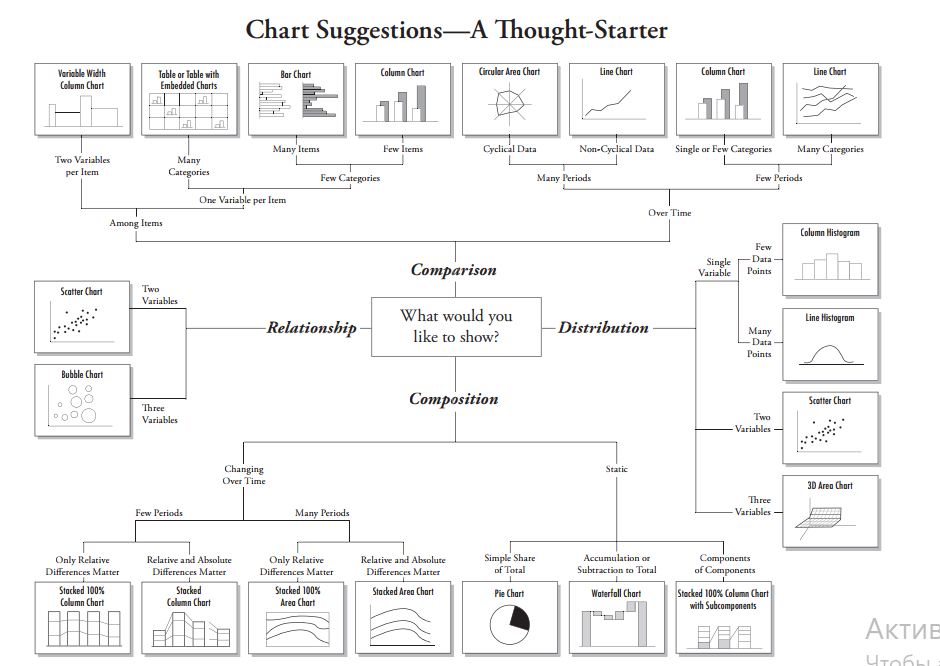

Сначала рассмотрим числовые признаки, затем - категориальные.

##### Выведем статистики вещественных и целочисленных признаков:

In [4]:
data[real_features].describe()

Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    59381.000000  59381.000000  59381.000000  59381.000000  59381.000000   
mean         0.328952      0.405567      0.707283      0.292587      0.469462   
std          0.282562      0.197190      0.074239      0.089037      0.122213   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.076923      0.238806      0.654545      0.225941      0.385517   
50%          0.230769      0.402985      0.709091      0.288703      0.451349   
75%          0.487179      0.567164      0.763636      0.345188      0.532858   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59362.000000       52602.000000       48527.000000   
mean            0.077582           0.006283           0.361469   
std             0.082347           0.032816           0.349551   
min             0.000000           0.000000           0.000000   
25%             0.035000           0.000000           0.060000   
50%             0.060000           0.000000           0.250000   
75%             0.100000           0.000000           0.550000   
max             1.000000           1.000000           1.000000   

       Insurance_History_5  Family_Hist_2  Family_Hist_3  Family_Hist_4  \
count         33985.000000   30725.000000   25140.000000   40197.000000   
mean              0.001733       0.474550       0.497737       0.444890   
std               0.007338       0.154959       0.140187       0.163012   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000400       0.362319       0.401961       0.323944   
50%               0.000973       0.463768       0.519608       0.422535   
75%               0.002000       0.579710       0.598039       0.563380   
max               1.000000       1.000000       1.000000       0.943662   

       Family_Hist_5  
count   17570.000000  
mean        0.484635  
std         0.129200  
min         0.000000  
25%         0.401786  
50%         0.508929  
75%         0.580357  
max         1.000000

In [5]:
data[real_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_4       59381 non-null  float64
 1   Ins_Age              59381 non-null  float64
 2   Ht                   59381 non-null  float64
 3   Wt                   59381 non-null  float64
 4   BMI                  59381 non-null  float64
 5   Employment_Info_1    59362 non-null  float64
 6   Employment_Info_4    52602 non-null  float64
 7   Employment_Info_6    48527 non-null  float64
 8   Insurance_History_5  33985 non-null  float64
 9   Family_Hist_2        30725 non-null  float64
 10  Family_Hist_3        25140 non-null  float64
 11  Family_Hist_4        40197 non-null  float64
 12  Family_Hist_5        17570 non-null  float64
dtypes: float64(13)
memory usage: 5.9 MB


In [6]:
data[discrete_features].describe()

Medical_History_1  Medical_History_10  Medical_History_15  \
count       50492.000000          557.000000        14785.000000   
mean            7.962172          141.118492          123.760974   
std            13.027697          107.759559           98.516206   
min             0.000000            0.000000            0.000000   
25%             2.000000            8.000000           17.000000   
50%             4.000000          229.000000          117.000000   
75%             9.000000          240.000000          240.000000   
max           240.000000          240.000000          240.000000   

       Medical_History_24  Medical_History_32  
count         3801.000000         1107.000000  
mean            50.635622           11.965673  
std             78.149069           38.718774  
min              0.000000            0.000000  
25%              1.000000            0.000000  
50%              8.000000            0.000000  
75%             64.000000            2.000000  
max            240.000000          240.000000

In [7]:
data[discrete_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Medical_History_1   50492 non-null  float64
 1   Medical_History_10  557 non-null    float64
 2   Medical_History_15  14785 non-null  float64
 3   Medical_History_24  3801 non-null   float64
 4   Medical_History_32  1107 non-null   float64
dtypes: float64(5)
memory usage: 2.3 MB


In [89]:
data[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 108 entries, Product_Info_1 to Medical_Keyword_48
dtypes: int64(107), object(1)
memory usage: 48.9+ MB


In [80]:
data.shape

(59381, 128)

## Задание 1: Ответьте на вопросы 
* Есть ли пропуски в данных? Перечислите вещественные и целочисленные признаки, которые известны для всех объектов.
   
* Перечислите вещественные и целочисленные признаки, значение которых известно менее, чем для половины объектов.
  
* Одинаков ли масштаб вещественных признаков? Масштаб целочисленных признаков? $^*$
    

$^*$ Будем считать, что масштаб двух признаков одинаков, если их минимумы отличаются не более, чем в 2 раза, и аналогично с максимумами.

### Ответы KormilcevaPN: 
1) Да, есть пропуски данных. Вещественные признаки, которые известны для всех объектов: 
- Product_Info_4       59381 non-null  float64
- Ins_Age              59381 non-null  float64
- Ht                   59381 non-null  float64
- Wt                   59381 non-null  float64
- BMI                  59381 non-null  float64

2) есть признаки, по которым отсутствуют данные более чем в 50% случаев.
- Family_Hist_3        25140 non-null  float64
- Family_Hist_5        17570 non-null  float64
- Medical_History_10   557 non-null    float64
- Medical_History_15   14785 non-null  float64
- Medical_History_24   3801 non-null   float64
- Medical_History_32   1107 non-null   float64

3) Одинаков ли масштаб вещественных признаков? Масштаб целочисленных признаков?
Да, одинаков. Минимумы и максимумы отличаются не более чем в 2 раза.

Мы видим, что в датасете есть признаки, которые не известны почти для всех объектов. Кроме того, легко проверить, что в выборке нет объектов, для которых известны все признаки, даже если рассматривать только вещественные. Значит, при решении задачи нужно было бы использовать более сложные методы обработки пропусков, чем удаление объектов.

##### Задание 2.  Постройте гистограммы для вещественных и целочисленных признаков.
Вместо того, чтобы в цикле по признакам строить отдельно каждую гистограмму, стоит воспользоваться методом hist датафрейма. Рекомендуется отдельно вывести гистограммы вещественных и целочисленных признаков. Установите размер изображения (20, 20) для первой группы признаков и  (10, 10) для второй, для обеих групп bins=100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9F3689C8>,
      dtype=object)

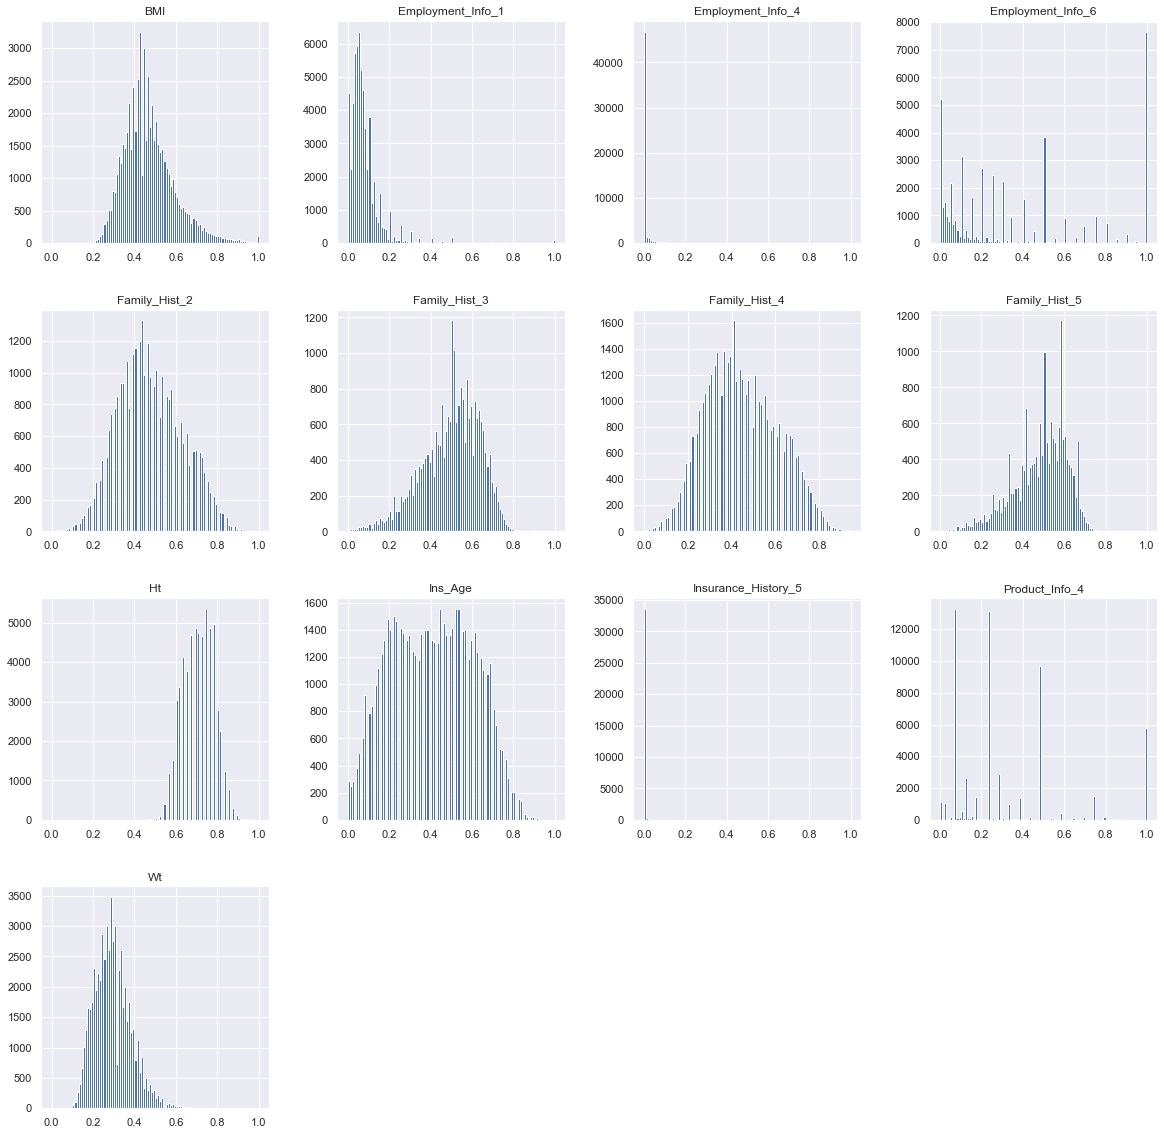

In [8]:
data[real_features].hist(figsize = (20,20), bins=100)

### Интерпретация KormilcevaPN:
присутствуют признаки с одним значением или с большим количеством выбросов, распределение не нормальное. Необходимо удалить данные признаки, либо логарифмировать.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFA88F3148>,
      dtype=object)

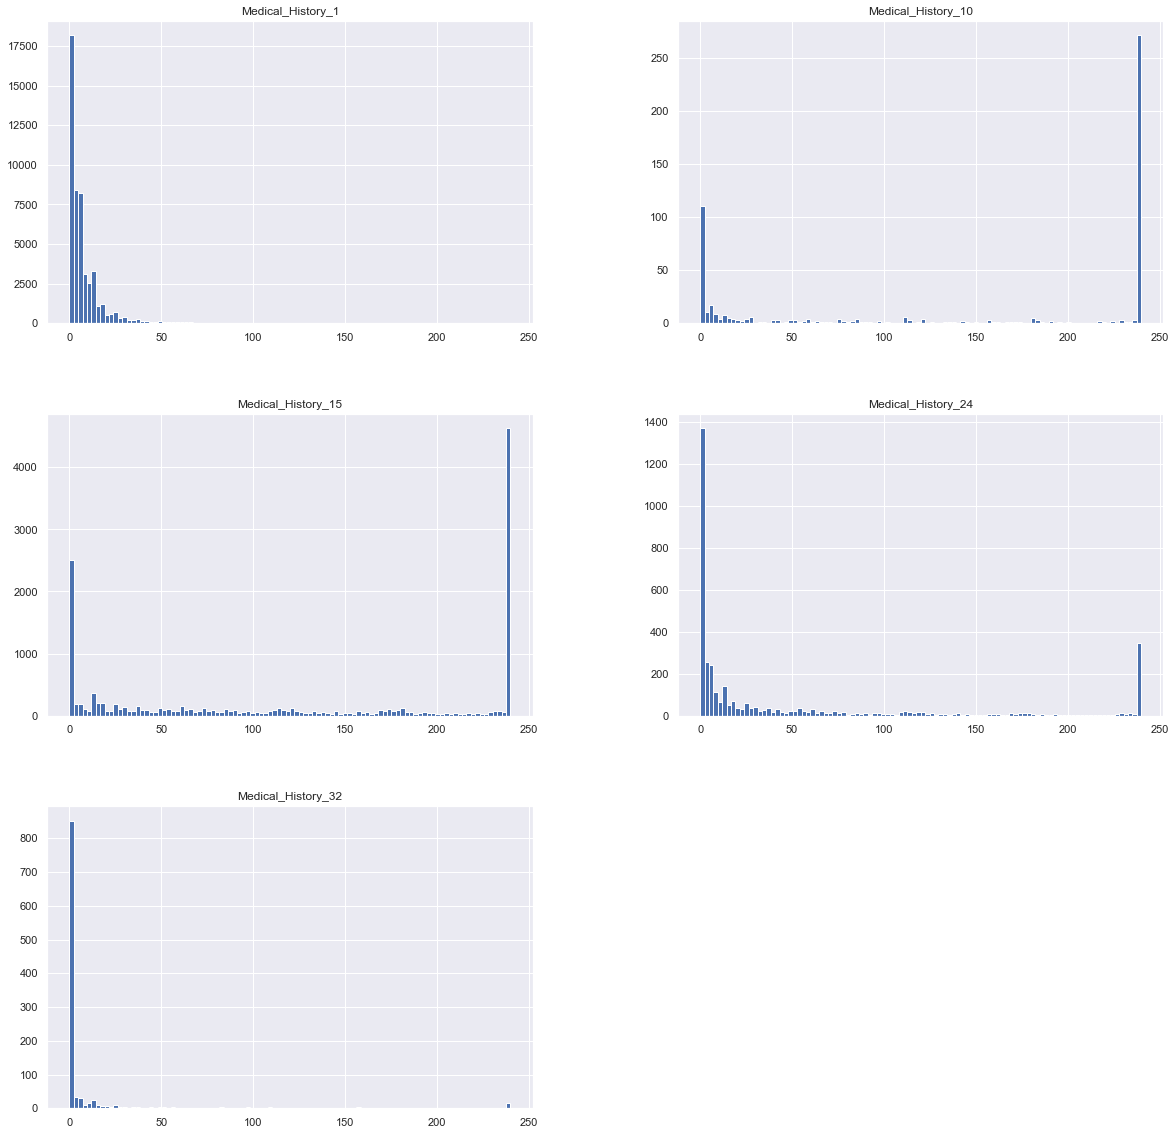

In [9]:
data[discrete_features].hist(figsize = (20,20), bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9F7FCAC8>,
      dtype=object)

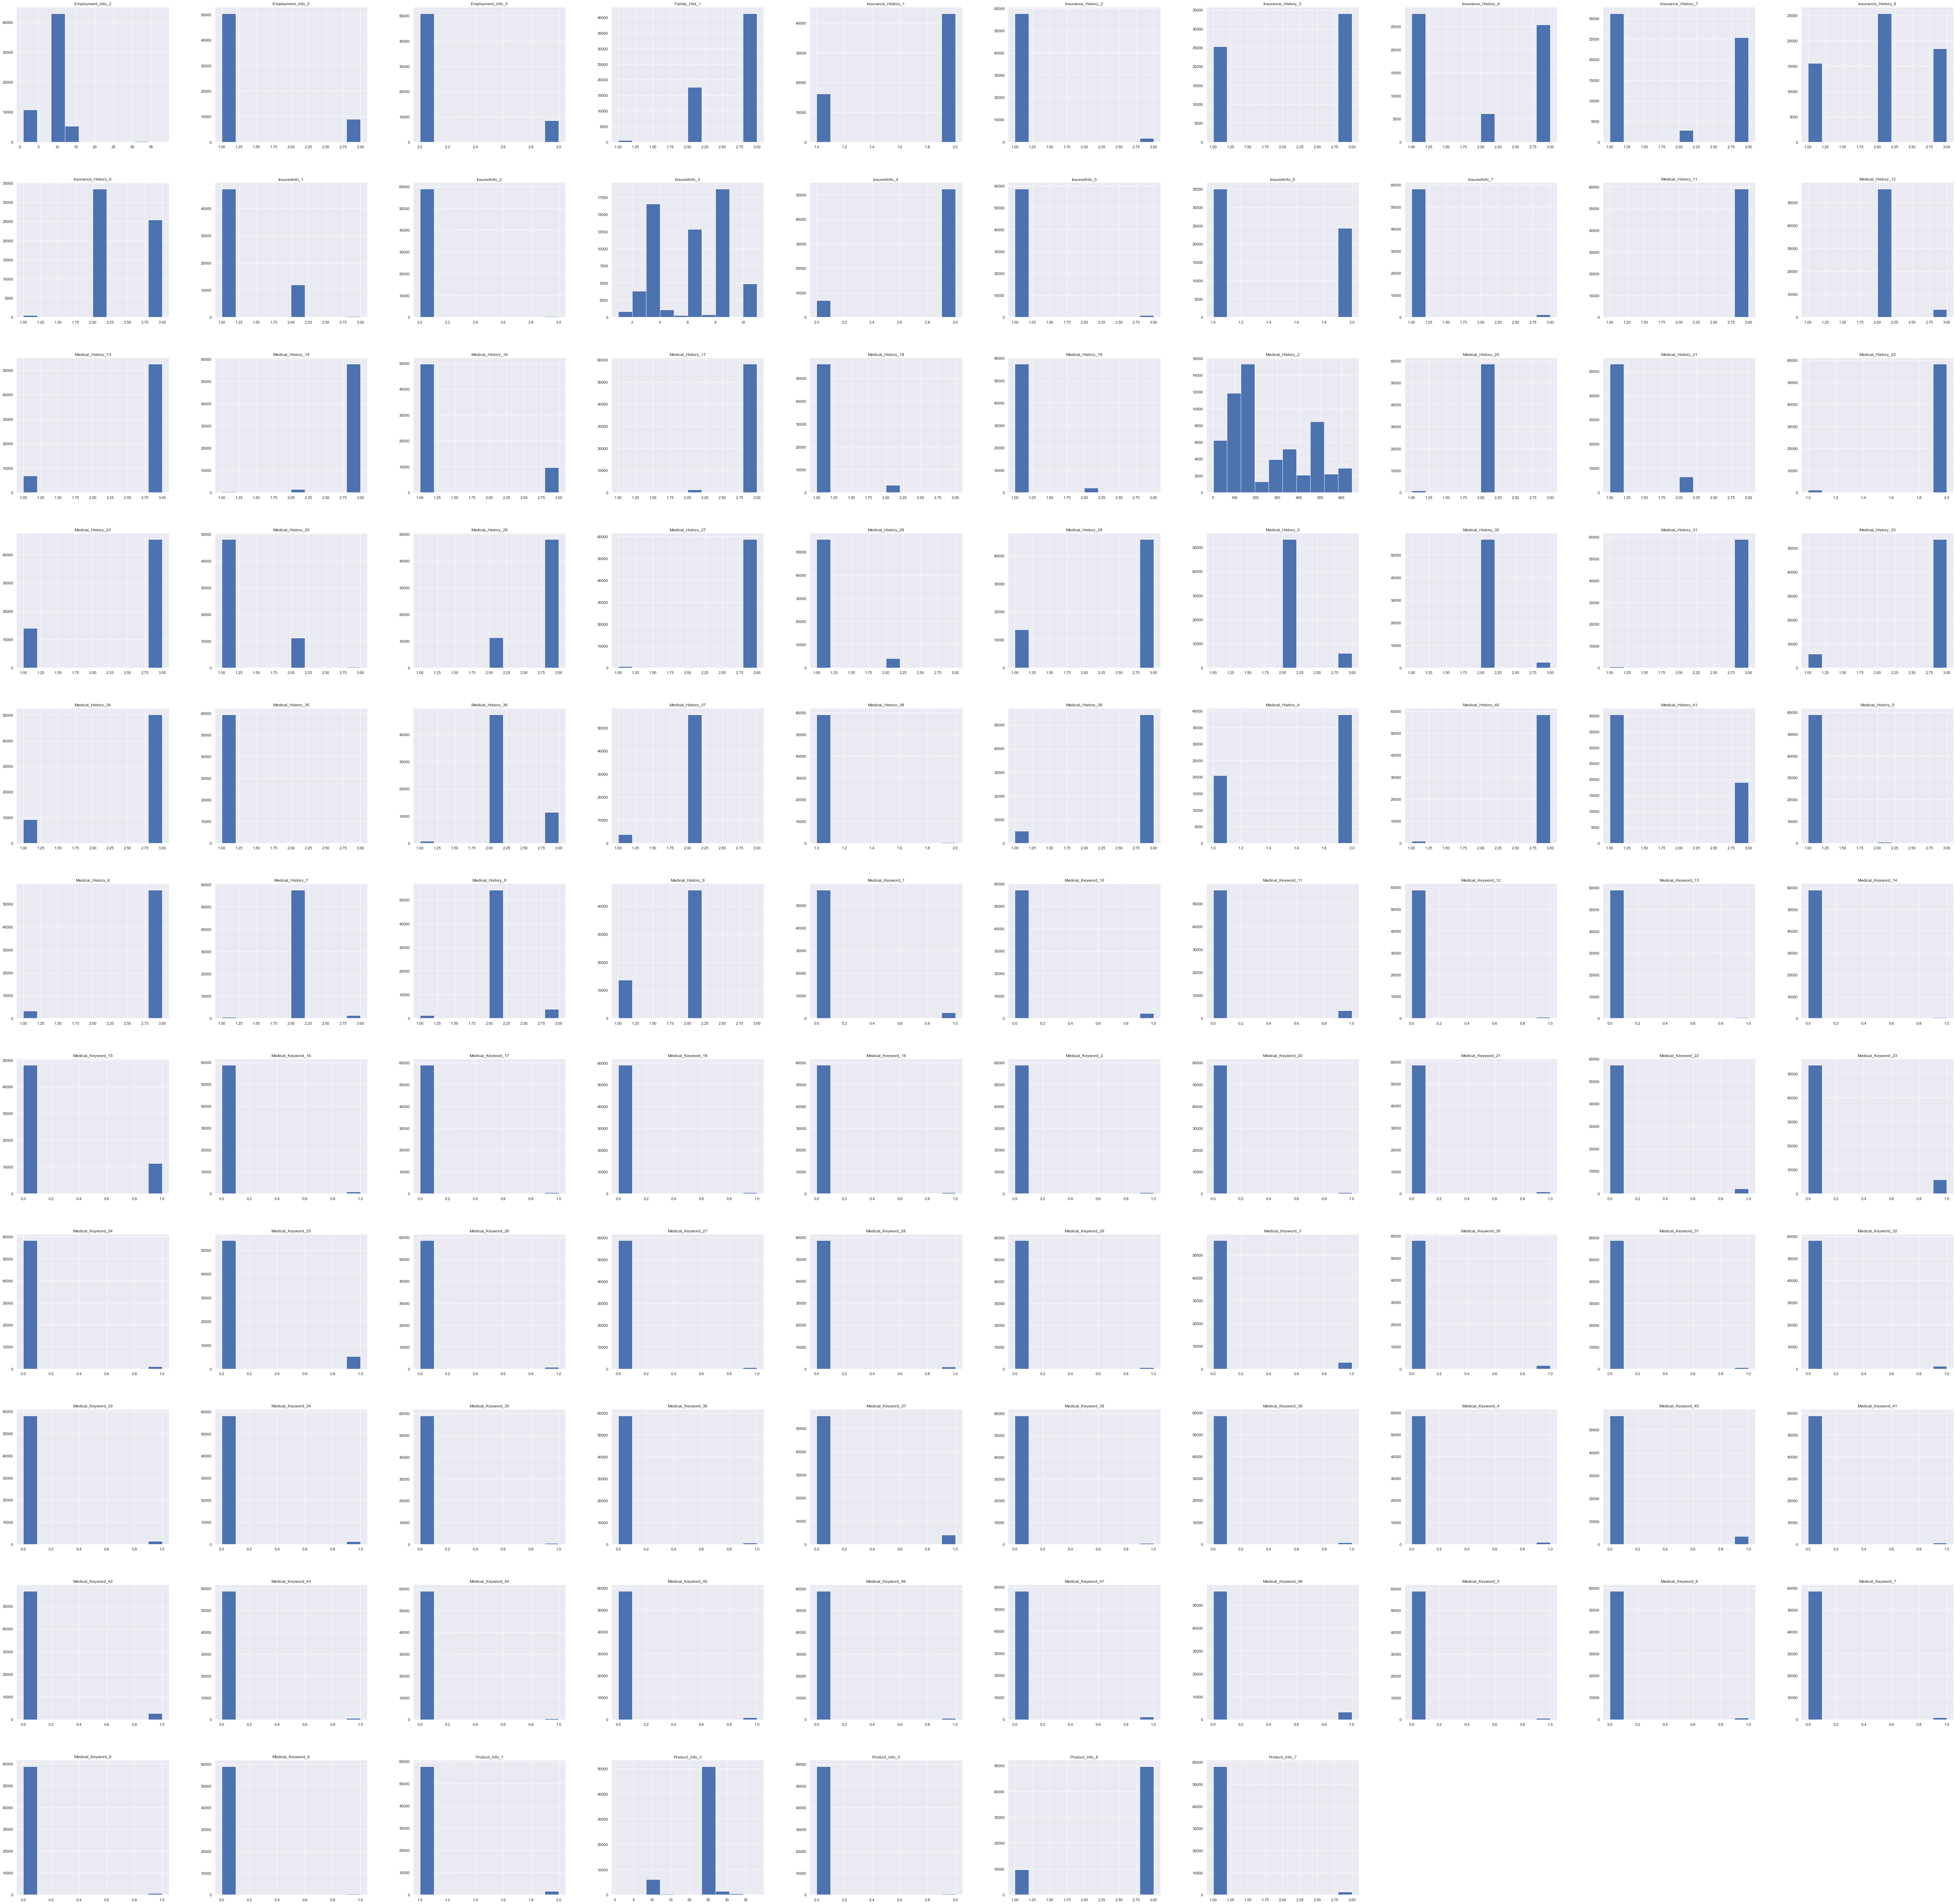

In [10]:
data[cat_features].hist(figsize = (100,100), bins=10)

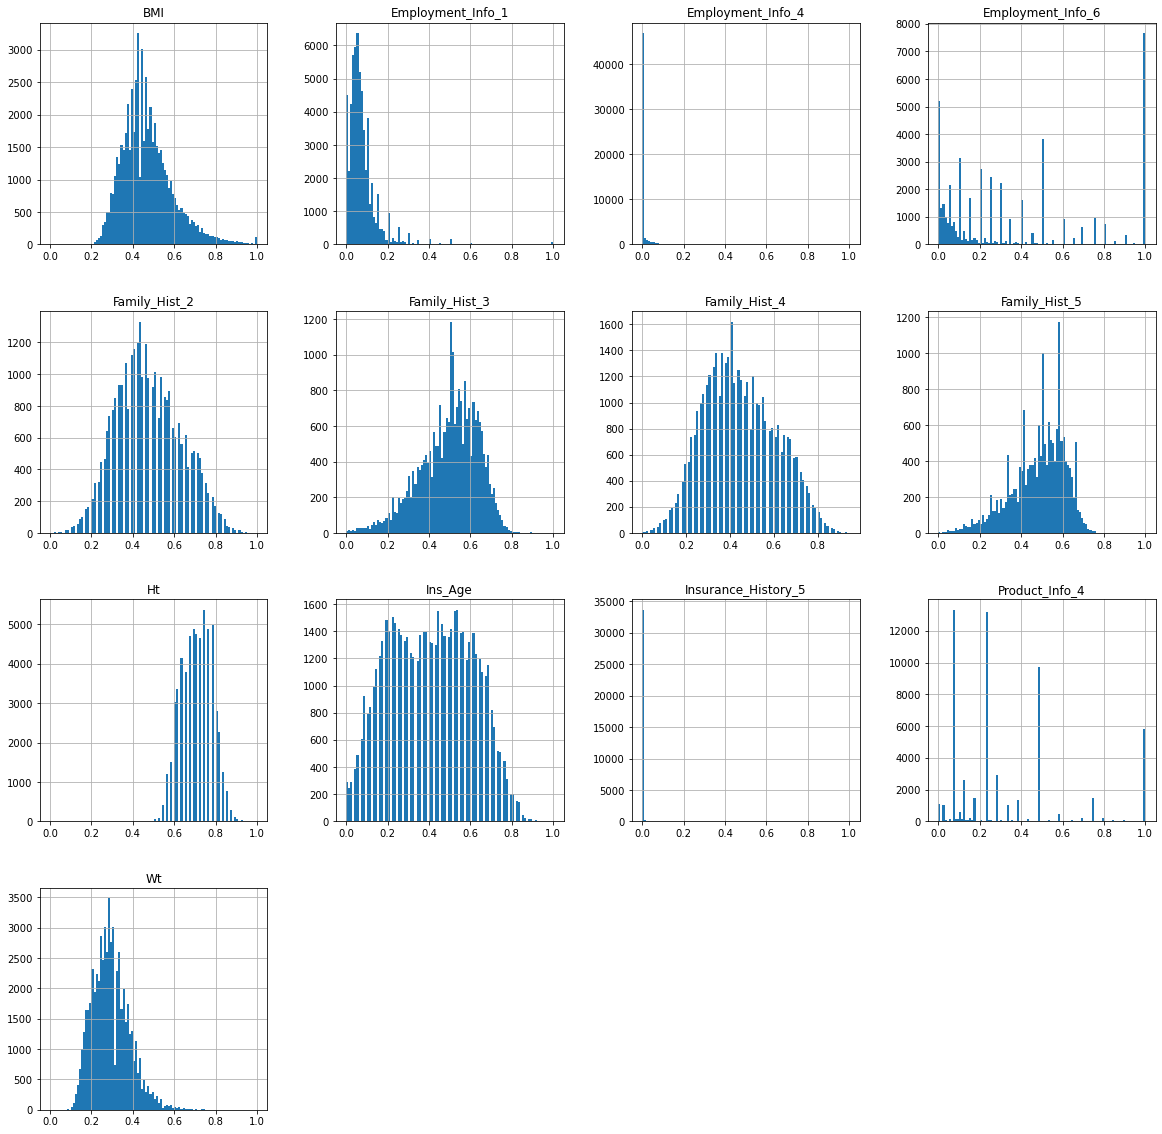

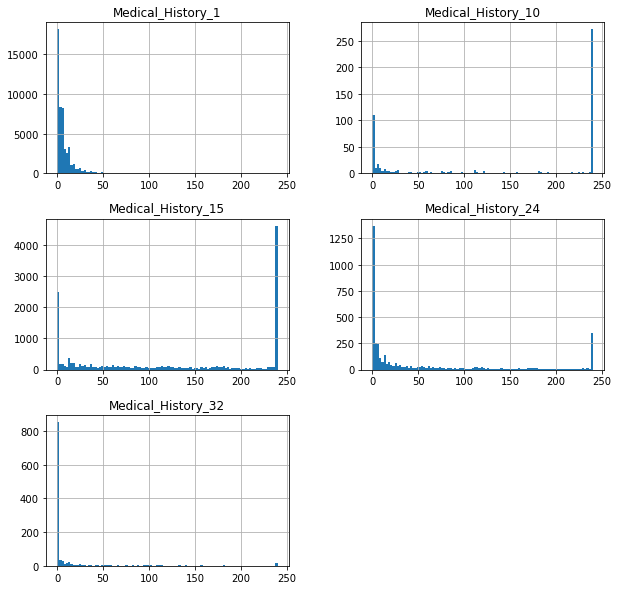

In [8]:
# Код 1. Постройте гистограммы. Диаграммы в разрезе заполнены выше.

## Задание 3. Ответьте на вопрос:__

* Есть ли константные признаки среди вещественных и целочисленных? Признак является константным, если множество его значений состоит из единственного элемента.

### Ответы KormilcevaPN:  
Да, есть такие переменные, например Insurance_History_5 принимает только значение 0. Employment_Info_4 принимает не является константой, то большая часть значений также является равным 0.
  
  

Среди вещественных есть признаки с очень большим перекосом в сторону какого-то одного значения (например, Employmennt_Info_4), возможно, их стоило бы прологарифмировать при решении задачи. Кроме того, есть признаки со сложной структурой гистограммы. 
Распределения целочисленных признаков (относящихся к группе медицинских) имеют схожую структуру. 

В целом данные разнородны, и описать их одним вероятностным распределением непросто. 

##### Теперь визуализируем признаки попарно. 
Построим scatterplot для пар вещественных признаков. Для этого в seaborn есть функция pairplot. Исключим признаки, распределение которых не похоже на колокол (хотя бы скошенный и неровный), тем самым мы уменьшим размер таблицы пар. На диагоналях таблицы будут стоять оценки распределений признаков (гистограммы или восстановленные плотности, diag_kind="hist" или "kde"). Если указать параметр hue = дискретный целевой признак, то разные его значения будут отображаться разными цветами.

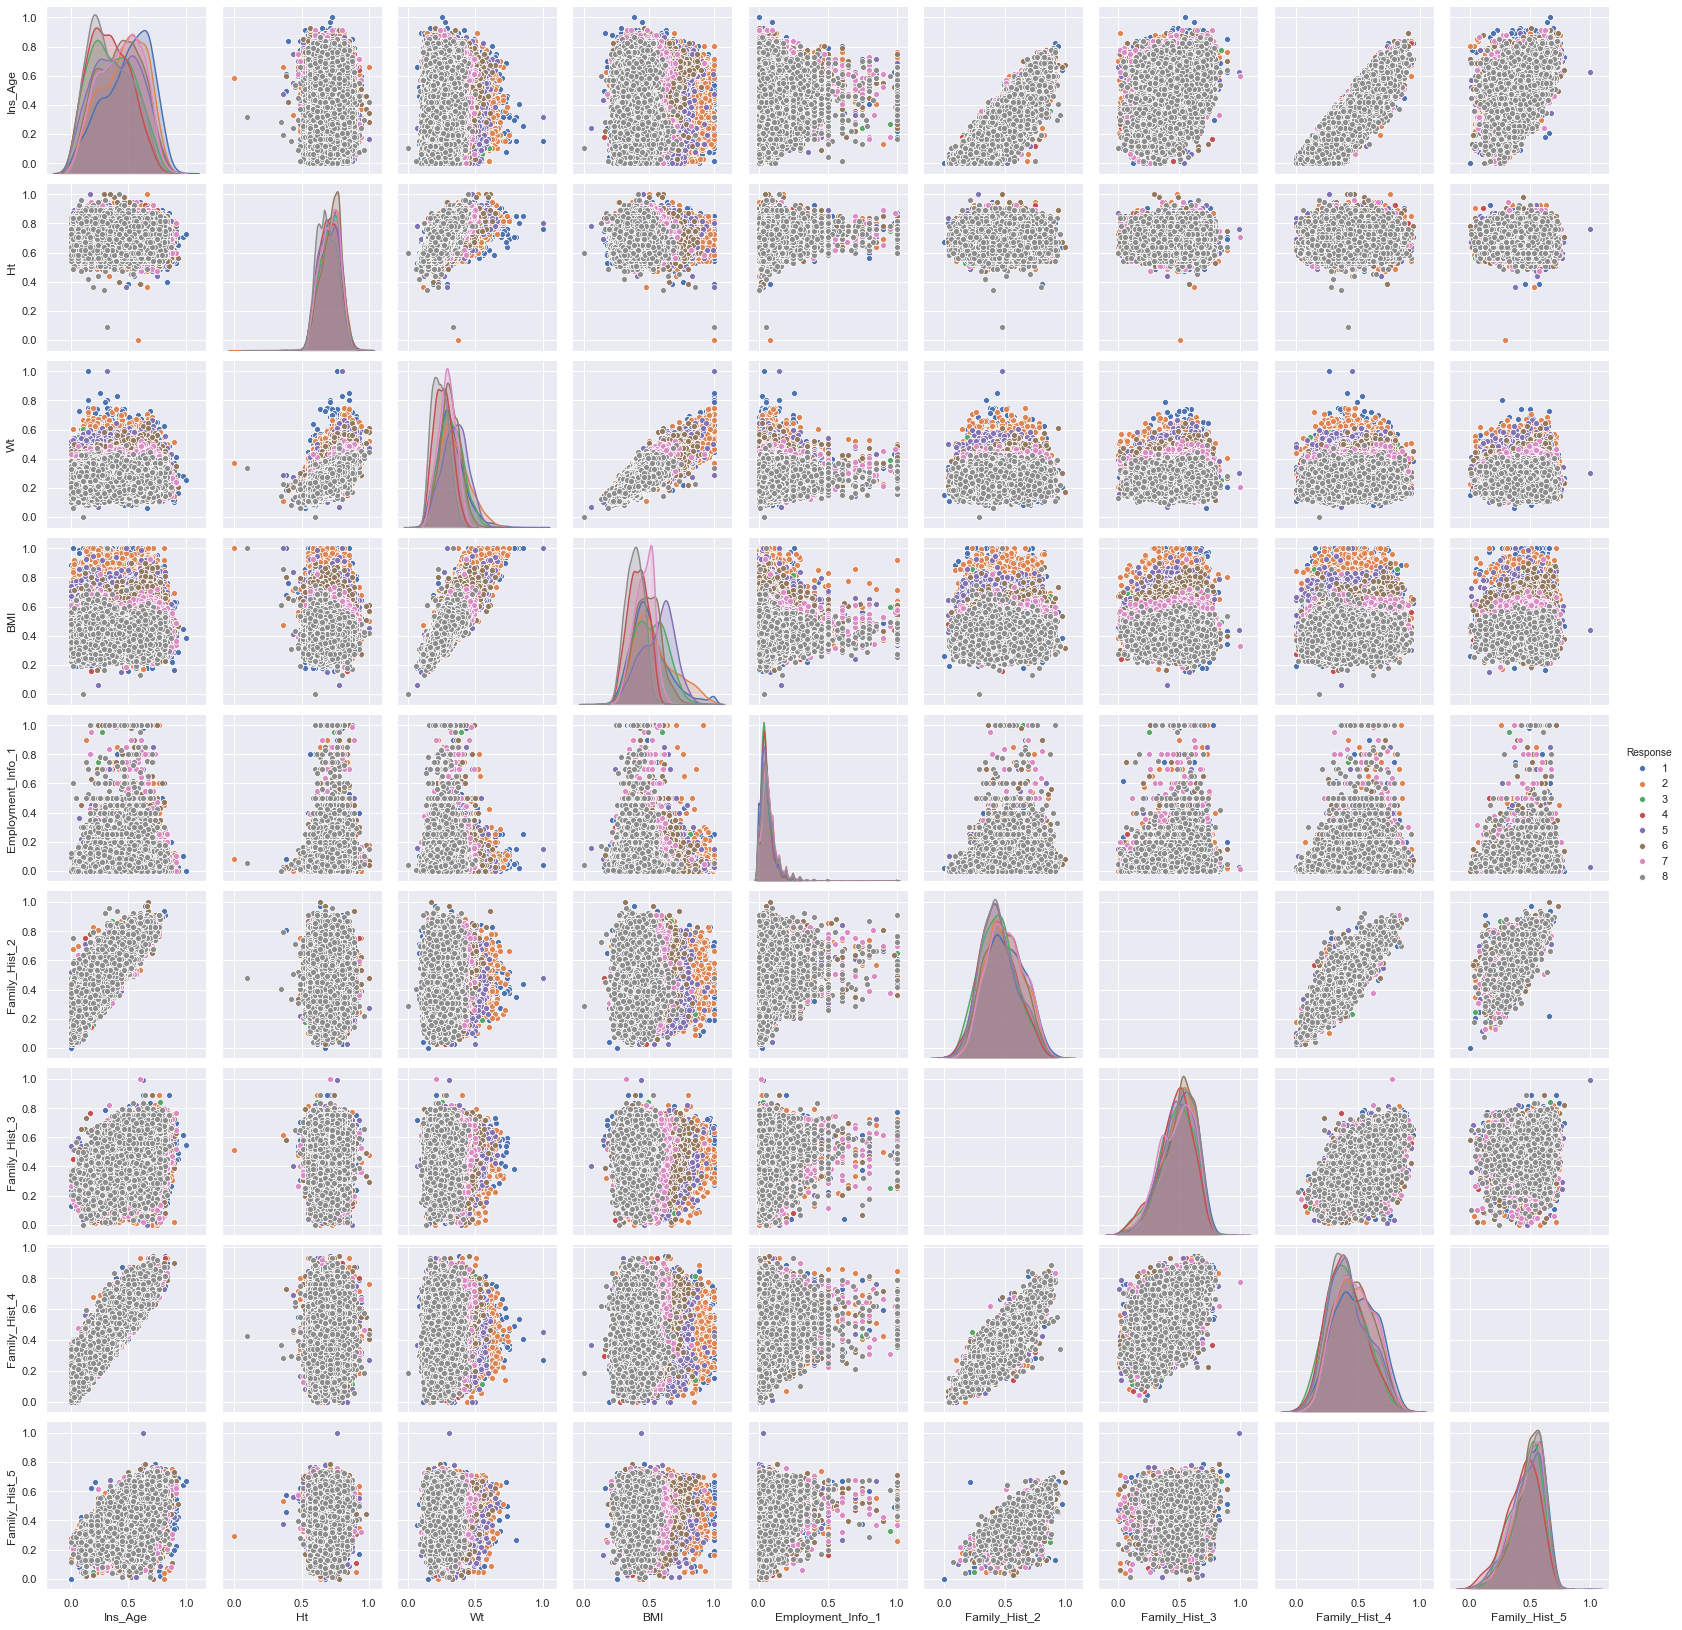

In [16]:
sns.pairplot(data[real_features+["Response"]].drop(
        ["Employment_Info_4", "Employment_Info_6", "Insurance_History_5", "Product_Info_4"], axis=1), 
        hue="Response", diag_kind="kde")

Классы накрывают друг друга, и графики не очень информативны. Но они позволяют ответить на некоторые вопросы о взаимоотношениях признаков и соотношений признаков и классов.

## Задание 4 _Ответьте на вопросы:__
* Есть ли пары признаков, у которых облака точек разных классов отличаются? Иными словами, есть ли графики, на которых видны облака разных классов, а не только последнего нарисованного?
  
  
* Есть ли объекты-выбросы, то есть такие точки, которые стоят далеко от общего облака точек?
  

### Ответы KormilcevaPN: 
1) Да, такие пары признаков есть.
2) Да, отдельные выбросы присутсвуют.

В целом облака точек выглядят достаточно компактно (в неформальном понимании этого слова), их можно приблизить искривленным кругом.

Теперь постройте такие же графики для целочисленных признаков (никакие признаки удалять не нужно, потому что таких признаков и так немного).

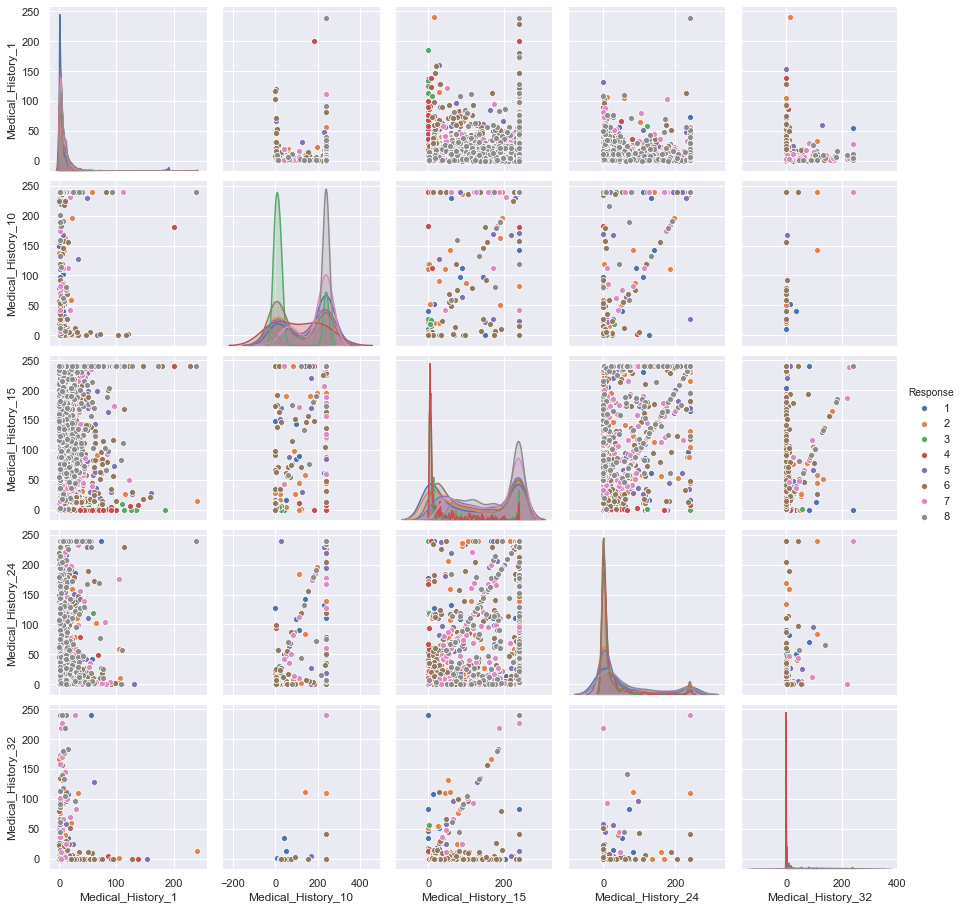

In [38]:
# Задание 5. Код 2. Постройте pairplot для целочисленных признаков
sns.pairplot(data[discrete_features+["Response"]],
    hue="Response", diag_kind="kde")

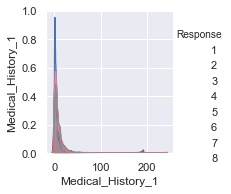

In [37]:
#при удалении определенных признаков
sns.pairplot(data[discrete_features+["Response"]].drop(
    ['Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32'], axis=1),
    hue="Response", diag_kind="kde")

Графики выглядят еще менее информативно. Заметна тенденция, что пары признаков сконцентрированы либо на стороне квадрата [0, 240] x [0, 240], либо на его диагонали, то есть признаки как-то связаны.

In [19]:
#корректируем данные
real_features=data[real_features].columns.drop(
    ["Employment_Info_4", "Employment_Info_6", "Insurance_History_5", "Product_Info_4",'Family_Hist_5','Family_Hist_3']).tolist()

In [20]:
data[real_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ins_Age            59381 non-null  float64
 1   Ht                 59381 non-null  float64
 2   Wt                 59381 non-null  float64
 3   BMI                59381 non-null  float64
 4   Employment_Info_1  59362 non-null  float64
 5   Family_Hist_2      30725 non-null  float64
 6   Family_Hist_4      40197 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


In [21]:
data[real_features].fillna(data[real_features].mean(axis=1), inplace=True)

In [22]:
data[real_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ins_Age            59381 non-null  float64
 1   Ht                 59381 non-null  float64
 2   Wt                 59381 non-null  float64
 3   BMI                59381 non-null  float64
 4   Employment_Info_1  59362 non-null  float64
 5   Family_Hist_2      30725 non-null  float64
 6   Family_Hist_4      40197 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


##### Посмотрим на корреляции признаков, чтобы узнать, не нужно ли удалять какие-то признаки перед (гипотетическим) построением модели. 

Для визуализации матрицы попарных корреляций удобно использовать функцию seaborn.heatmap, она автоматически подпишет признаки на осях и покажет colorbar. Мы вычисляем корреляции только между вещественными признаками, для целочисленных признаков корреляции вычисляется по другим формулам.

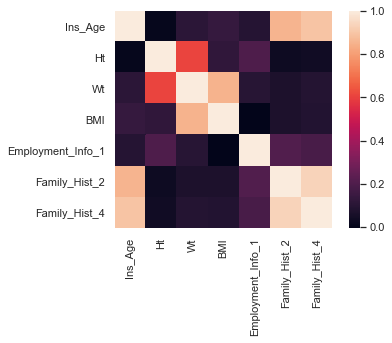

In [23]:
sns.heatmap(data[real_features].corr(), square=True)

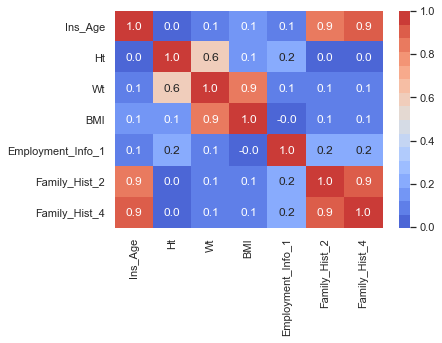

In [24]:
f, ax = plt.subplots()

sns.heatmap(data[real_features].corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

In [25]:
data[real_features].corr() > 0.9

Ins_Age     Ht     Wt    BMI  Employment_Info_1  \
Ins_Age               True  False  False  False              False   
Ht                   False   True  False  False              False   
Wt                   False  False   True  False              False   
BMI                  False  False  False   True              False   
Employment_Info_1    False  False  False  False               True   
Family_Hist_2        False  False  False  False              False   
Family_Hist_4        False  False  False  False              False   

                   Family_Hist_2  Family_Hist_4  
Ins_Age                    False          False  
Ht                         False          False  
Wt                         False          False  
BMI                        False          False  
Employment_Info_1          False          False  
Family_Hist_2               True           True  
Family_Hist_4               True           True

# Задание 6_Ответьте на вопрос __:
* Есть ли пара (несовпадающих) признаков, корреляция между которыми больше 0.9 ? Если есть, то выпишите эту пару. Напоминаем, что матрица корреляций симметрична, и дважды выписывать одну пару признаков не нужно.


### KormilcevaPN ответы:
Да, такие пары существуют.
Family_Hist_2 и Family_Hist_4

Перейдем к визуализации категориальных признаков.

##### Посчитаем количество значений для каждого признака.
Строим много графиков вручную (а не с помощью готовой функции, как с hist или pairplot). Для этого создаем новую pyplot-фигуру, указываем, сколько графиков на ней будет, задаем размер; параметр sharey говорит не подписывать все оси отдельно, а подписать их только один раз слева; здесь это уместно, потому что масштабы всех счетчиков одни и те же. 

В цикле по всем категориальным признакам строим countplot признака с помощью seaborn. Указываем параметр data, какой признак визуализировать, а также передаем ссылку на конкретную ячейку таблицы, в которой нужно изобразить график. Признаков всего 108, поэтому последние две ячейки таблицы графиков размером 11 x 10 останутся пустыми.

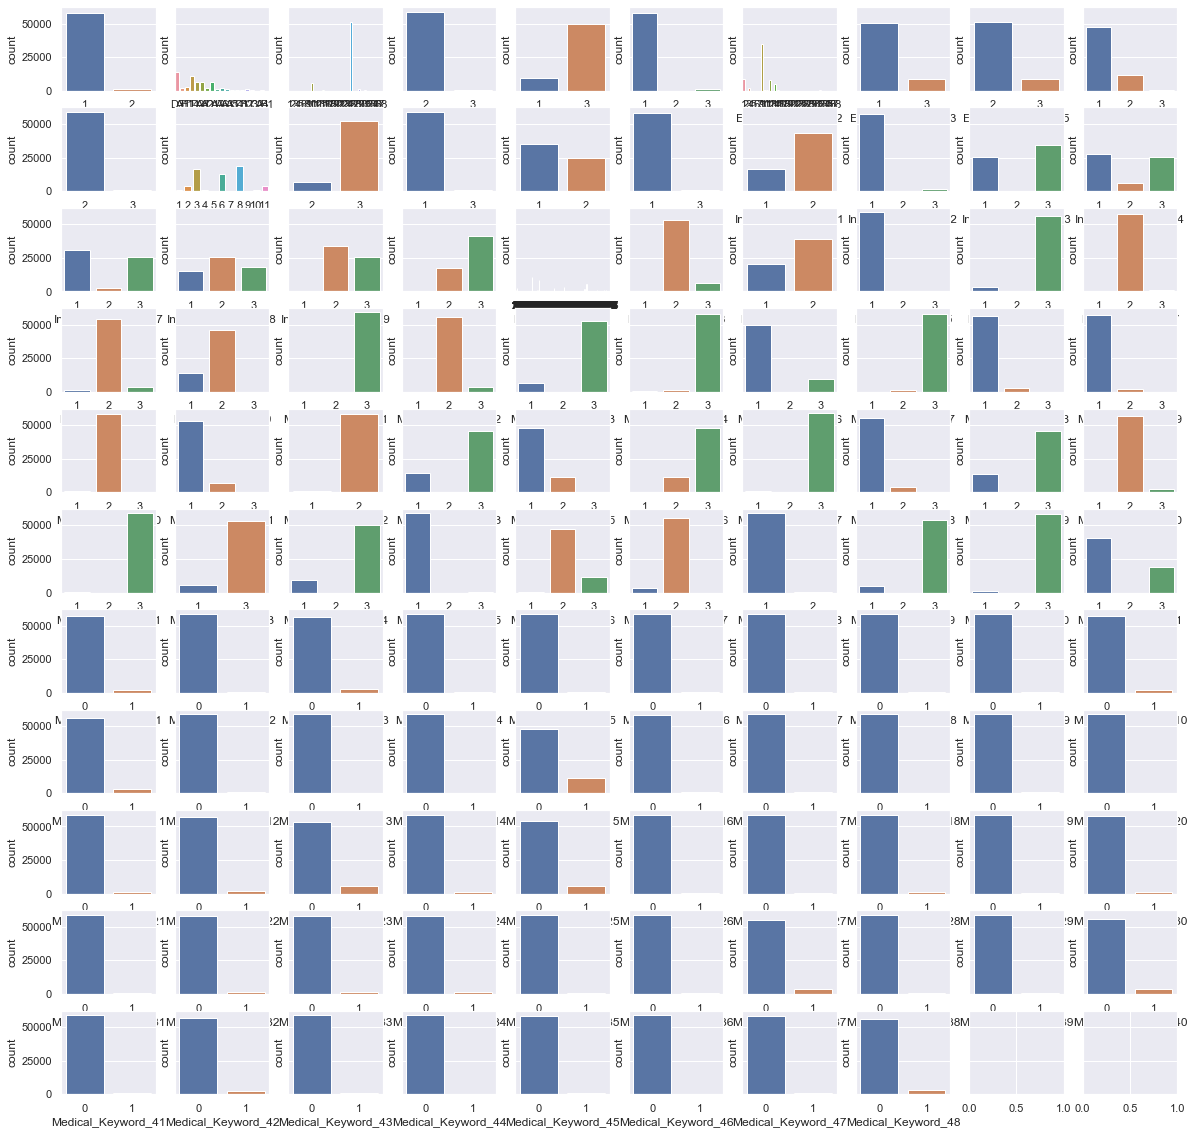

In [27]:
fig, axes = plt.subplots(11, 10, figsize=(20, 20), sharey=True)
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=data, ax=axes[i // 10, i % 10])

## Задание 7__Ответьте на вопросы __:
* Есть ли среди категориальных признаков константные?
   
   
* Есть ли признаки с количеством возможных категорий (число значений признака) больше 5?
    

### KormilcevaPN ответы:
1. Да, такие признаки есть.
2. Да, такие признаки есть.

У нас есть много признаков с сильными перекосами в сторону отдельного признака. Учитывая, что среди категориальных признаков много медицинских показателей, можно предположить, что именно эти признаки сильно влияют на увеличение риска (целевой признак). Проверить это предположение можно, построив такие же countplot с разбивкой каждого значения дополнительно по классам (то есть у нас будет несколько групп столбиков, и в каждой группе их будет 8). Это можно сделать, указав параметр hue в этой функции аналогично тому, как мы это делали выше.

Постройте графики countplot для признаков 'Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45' (признаки выбраны случайно) с разбивкой по классам.

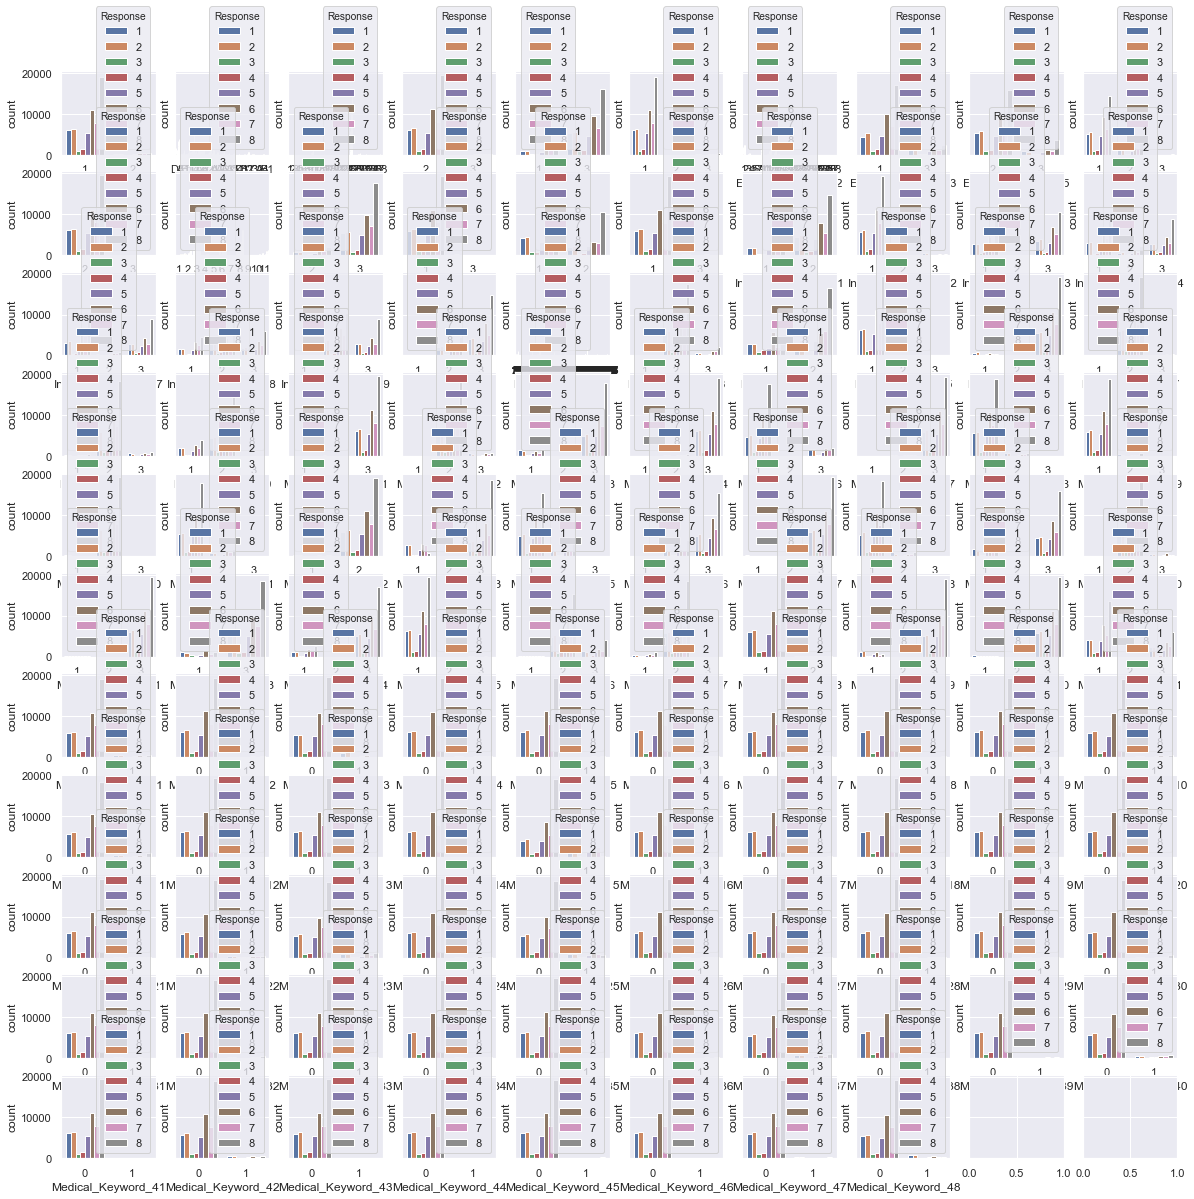

In [32]:
fig, axes = plt.subplots(11, 10, figsize=(20, 20), sharey=True)
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=data, ax=axes[i // 10, i % 10], hue="Response")

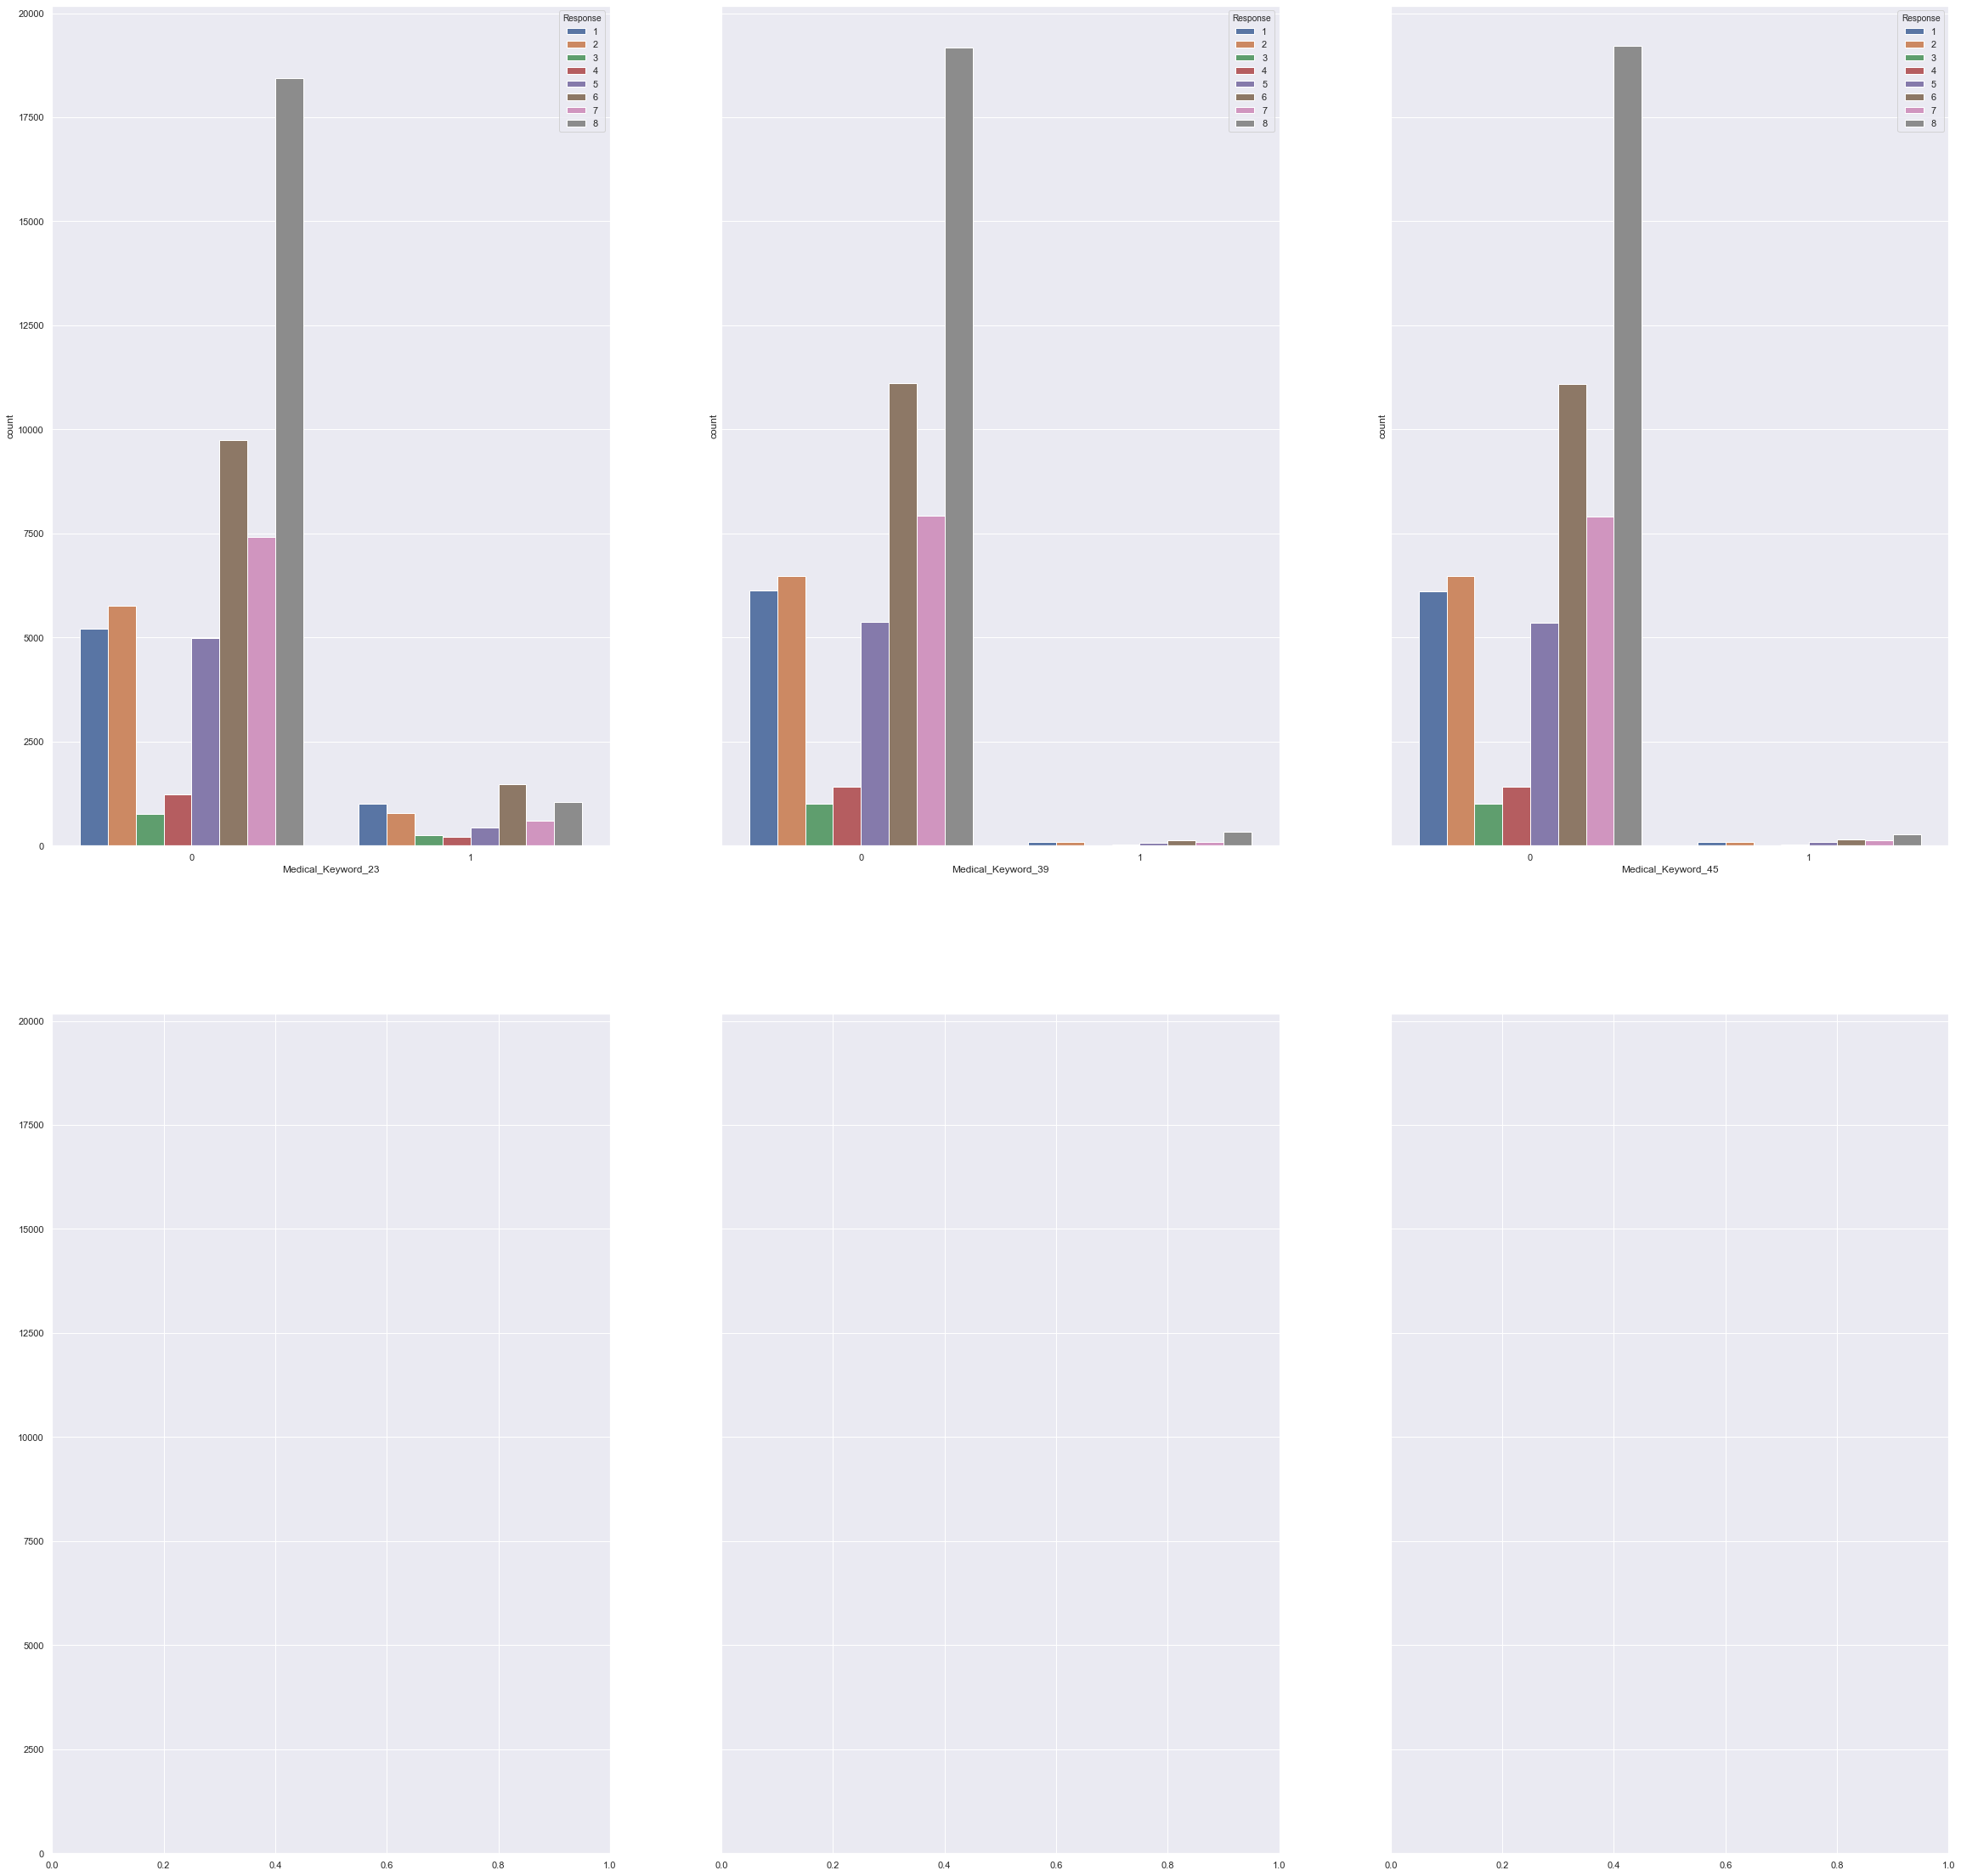

In [66]:
##Задание 8. Код 3. Постройте countplot
fig, axes = plt.subplots(2, 3, figsize=(40, 40), sharey=True)
for i in range(len(['Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45'])):
    sns.countplot(x=['Medical_Keyword_23', 'Medical_Keyword_39', 'Medical_Keyword_45'][i], data=data, ax=axes[i // 10, i % 10], hue="Response")

    


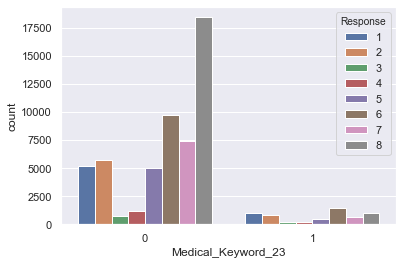

In [67]:
sns.countplot(x=data.Medical_Keyword_23, data=data, hue="Response")

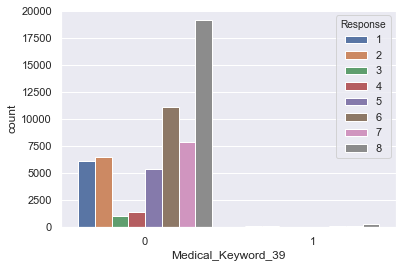

In [68]:
sns.countplot(x=data.Medical_Keyword_39, data=data, hue="Response")

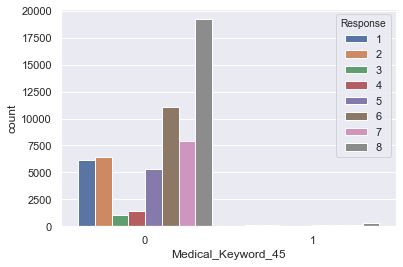

In [52]:
sns.countplot(x=data.Medical_Keyword_45, data=data, hue="Response")

__Ответьте на вопрос __:
* Наличие каких из этих трех факторов сильно повышает риск? Будем считать, что наличие признака сильно повышает риск, если количество человек, имеющих этот признак (то есть он для них равен 1) и отнесенных к категории риска 8, больше, чем такая же величина для любой другой категории риска.
  

### KormilcevaPN ответы:
Факторы 'Medical_Keyword_39', 'Medical_Keyword_45' сильнее повышают риск оказаться в катеогории риска 8. Так как количество человек, имеющих положительный ответ на наличие 'Medical_Keyword_39', 'Medical_Keyword_45' и отнесенных к группе риска 8 больше, чем к какой-либо другой категории риска.

##### Наконец, посмотрим на распределение целевого признака, чтобы узнать, сбалансированы ли классы:

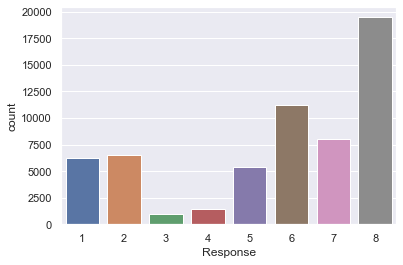

In [69]:
sns.countplot(data.Response)

В категорию 8 люди попадают чаще, чем в другие категории.

## Part_2_ Визуализация с помощью понижения размерности


https://sphere.mail.ru/materials/video/373/

Далее можно воспользоваться средствами понижения размерности. Для задачи с дискретным целевым признаком это позволит понять, какие классы хорошо разделяются, а какие - нет.

Такие методы строят матрицу попарных расстояний между объектами, которая в случае, когда объектов много, будет занимать много памяти. Кроме того, отображать много точек на scatter plot (а именно его используют для визуализации результата понижения размерности) неудобно. Поэтому мы перемешаем выборку (и далее будем использовать ее) и выберем првые 1000 объектов для понижения размерности. Вы можете попробовать взять больше объектов.

In [7]:
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

In [8]:
sdata = shuffle(data, random_state=321)
# del data   # удалите неперемешанные данные, если не хватает оперативной памяти

Методы sklearn не принимают матрицы с пропусками (nan). Чтобы избежать этой проблемы, не будем рассматривать признаки, которые имеют много пропусков (последние четыре в списке вещественных признаков). Кроме того, ограничимся рассмотрением вещественных признаков.

В следующей ячейке мы отбираем нужные признаки, затем находим объекты, у которых все признаки известны (нет пропусков в выбранных признаках), а затем создаем отдельно матрицу объекты-признаки для работы методов понижения размерности и отдельно вектор правильных ответов на этих объектах: data_subset и response_subset. Кроме того, мы дополнительно стандартизуем нашу маленькую выборку, потому что методы понижения размерности очень чувствительны к разномасштабным данным (это отдельно указано в [туториале](http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling) в sklearn)

In [9]:
subset_l  = 1000
selected_features = real_features[:-4]
objects_with_nan = sdata.index[np.any(np.isnan(sdata[selected_features].values), axis=1)]   
data_subset = scale(sdata[selected_features].drop(objects_with_nan, axis=0)[:subset_l])
response_subset = sdata["Response"].drop(objects_with_nan, axis=0)[:subset_l]

Будем строить визуализацию методами,  t-SNE и MDS.

In [10]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

Методы понижения размерности имеют такой же интерфейс, как классификаторы и регрессоры. Для построения визуализации t-SNE нужно создать объект класса и вызвать его метод fit_transform, который вернет матрицу размера число объектов x новая размерность; по умолчанию новая размерность равна 2. 


Выполните эти действия и запишите результат работы метода в переменную tsne_representation.

Ознакомиться с параметрами метода можно на [странице документации TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE). <font color="red"> Зафиксируйте случайное приближение random_state=321, чтобы результат визуализации у всех был одинаковый. </font> 

In [11]:
# Присвоим переменной tsne_representation результат понижения размерности методом tSNE с параметрами по умолчанию

tsne_representation = TSNE(random_state=321, n_jobs=-1).fit_transform(data_subset)

Визуализируем полученное представление. Для этого создадим набор цветов по количеству классов, а затем в цикле по классам будем отображать представления точек, относящихся к этому классу. Будем указывать параметр alpha=0.5, чтобы сделать точки полупрозрачными, это лучше в ситуации, когда точки накладываются.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

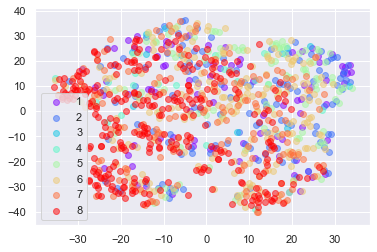

In [12]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(data.Response), colors):
    plt.scatter(tsne_representation[response_subset.values==y, 0], 
                tsne_representation[response_subset.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

Теперь сделаем то же с MDS.

In [13]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

In [14]:
# Код 5. Присвойте переменной MDS_transformed результат понижения размерности методом MDS с параметрами по умолчанию
# Не забудьте зафиксировать random_state=321

MDS_transformed = MDS(random_state=321, n_jobs=-1).fit_transform(data_subset)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

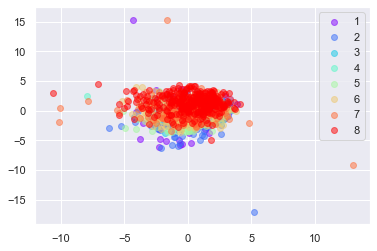

In [15]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed[response_subset.values==y, 0], 
                MDS_transformed[response_subset.values==y, 1], 
                c=c, alpha=0.5, label=str(y))
plt.legend()
#plt.xlim(-5, 5)   # масса точек концентрируется в этом масштабе
#plt.ylim(-5, 5)   # рекомендуем сначала отобразить визуализацию целиком, а затем раскомментировать эти строки.

Для построения представления можно пробовать разные метрики, их список доступен в [документации scipy](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) (потому что sklearn использует метрики scipy). Вы можете попробовать использовать разные метрики в t-SNE и MDS и смотреть получающиеся визуализации



In [18]:
# Присвоим переменной MDS_transformed_cos результат понижения размерности методом MDS с косинусной метрикой
MDS_transformed_cos = MDS(dissimilarity='precomputed').fit_transform(pairwise_distances(data_subset,
                                                                                        metric='cosine',
                                                                                        n_jobs=-1))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

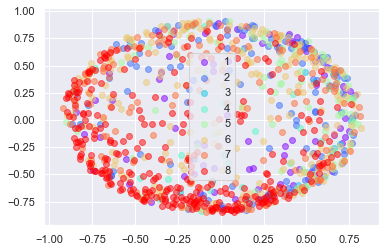

In [19]:
colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed_cos[response_subset.values[:subset_l]==y, 0], 
                MDS_transformed_cos[response_subset.values[:subset_l]==y, 1], 
                c=c, alpha=0.5, label=str(y))
plt.legend()

## Задание 9__Ответьте на вопросы:__ Будем нумеровать визуализации от 1 до 3: tSNE, MDS по умолчанию, MDS с косинусной метрикой.

* Есть ли визуализация, на которой классы хорошо разделяются? Классы хорошо разделяются, если между облаками точек разных классов можно проводить границы. Если есть, укажите хотя бы одну такую визуализацию.
    
* Есть ли визуализации, по которым видно, что объекты с наименьшим риском (1 и 2) отличаются от объектов с высоким риском (7 и 8)? Будем считать, что объекты классов A и B отличаются, если можно выделить область плоскости, в которой в целом больше точек класса A, и можно выделить область, в которой больше точек класса B. Если есть, укажите хотя бы одну такую визуализацию.
   
* Есть ли визуализации, на которым видны отдельно стоящие (от общего облака) точки? Если есть, укажите хотя бы одну такую визуализацию.
    

### KormilcevaPN ответы: 
1. Ярко выраженных визуализаций нет. В большинстве случаев класс 7-8 перекрывает собой остальные классы.
2. Ярко выраженных визуализаций нет. В большинстве случаев класс 7-8 перекрывает собой классы 1-2.
3. Да, такие визуализации есть. Это можель построенная на основе MDS_transformed_cos.


Визуализации разными методами достаточно сильно отличаются, но на каждой можно условно выделить направление, вдоль которого происходит увеличение риска от 1 до 8 (то есть точки постепенно меняют цвет). Если бы это не выполнялось, можно было бы предположить, что задача не решаема.

### Задание 10.  Построить визуализацию методам PCA (Пример Метод главных компонент.ipynb )

### KormilcevaPN визуализация методом PCA 

In [20]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

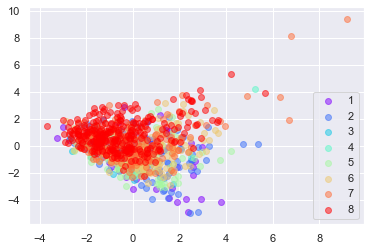

In [21]:
pca = PCA()
data_subset_pca=pca.fit_transform(data_subset)



colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(data_subset_pca[response_subset.values==y, 0], 
                data_subset_pca[response_subset.values==y, 1], 
                c=c, alpha=0.5, label=str(y))
plt.legend()
plt.show()

## Part_3_ Поиск аномалий



Выявление аномалий (также обнаружение выбросов) — это опознавание во время интеллектуального анализа данных редких данных, событий или наблюдений, которые вызывают подозрения ввиду существенного отличия от большей части данных. 

Обычно аномальные данные превращаются в некоторый вид проблемы, такой как мошенничество в банке, структурный дефект, медицинские проблемы или ошибки в тексте. Аномалии также упоминаются как выбросы, необычности, шум, отклонения или исключения.

Часто выявление аномалий используется для предварительной обработки данных с целью удаления аномалий. При обучении с учителем удаление аномальных данных из набора часто приводит к существенному статистическому увеличению точности


Выбросы являются следствием:

- ошибок в данных (неточности измерения, округления, неверной записи и т.п.)
- наличия шумовых объектов (неверно классифицированных объектов)
- присутствия объектов «других» выборок (например, показаниями сломавшегося датчика).





### Методы обнаружения выбросов:

- Как далеко находится объект от своего k-ого ближайшего соседа
- Какое среднее расстояние от объекта до k ближайших соседей?
- Наблюдение аномально, если его локальная плотность намного меньше локальной плотности его ближайших соседей



1)  статистические подходы (box-plot, гистограмма и т.д.). Как правило, применяют для отдельных признаков и отлавливают экстремальные значения (Extreme-Value Analysis). Для этого используют, например, Z-value или Kurtosis measure.

Многие методы визуализации, например ящик с усами, имеют встроенные средства для детектирования и показа таких экстремальных значений.

2) Модельные тесты 


Идея очень простая – мы строим модель, которая описывает данные. Точки которые сильно отклоняются от модели (на которых модель сильно ошибается) и есть аномалии. При выборе модели мы можем учесть природу задачи, функционал качества и т.п.


3) Метрические методы (мерой аномальности может служить, например «расстояние до k-го соседа»)

Это самые популярные методы среди исследователей. В них постулируется существование некоторой метрики в пространстве объектов, которая и помогает найти аномалии. Интуитивно понятно, что у выброса мало соседей, а у типичной точки много. Поэтому хорошей мерой аномальности может служить, например «расстояние до k-го соседа» (см. метод Local Outlier Factor). Здесь используются специфические метрики, например расстояние Махалонобиса.



4) Методы машинного обучения

Традиционно многие классификационные задачи пытаются решить двух- или многоклассовую ситуацию. Цель приложения машинного обучения - различать тестовые данные между несколькими классами с помощью обучающих данных. Но что, если у вас есть данные только одного класса, и цель состоит в том, чтобы протестировать новые данные и выяснить, похожи они или нет на данные обучения? Методом для этой задачи, который приобрел большую популярность за последние два десятилетия, является машина одноклассных опорных векторов
Задача заключается в том, чтобы определить: является ли данный объект членом некоторого класса (который определяется обучающей выборкой) или нет. 

Таким образом, мы имеем задачу "одноклассовой" классификации, поскольку данных об аномалиях у нас нет (если бы они были, можно было бы решать задачу бинарной классификации - выброс\не выброс). 

Примером такой задачи является детектирование различных сбоев в работе сложных систем: обучающая выборка состоит из данных, описывающих нормальную работу такой системы, а целью является определение ситуаций, в которых что-то работает не так. Если бы мы могли симулировать неправильную работу систему, то можно было бы решать задачу бинарной классификации. Другой пример: мы хотим определять - есть ли на фотографии человек? Мы можем собрать очень большую обучающую выборку, содержащую фотографии людей. Однако какие фотографии следует поместить в выборку "не людей"?

Общая схема таких алгоритмов такова: по обучающей выборке (содержащей только обычные данные), алгоритм строит модель, описывающую её. Если вновь пришедший объект слишком отличается от этой модели по какой-либо метрике, тогда он считается выбросом.



-  AdaBoost - выбросы набирают вес при построении новых моделей, решение - исключаем объекты из выборки, которые быстро набирают вес
- метод опорных векторов для одного класса (OneClassSVM) - скорее алгоритм поиска новизны, а не выбросов, т.к. «затачивается» под обучающую выборку
- изолирующий лес (IsolationForest) - одна из вариаций случайного леса, каждое дерево строится до исчерпании выборки, при разбиении выбирается случайные признак и расщепление, для каждого объекта мера его нормальности – среднее арифметическое глубин листьев, в которые он попал (изолировался)



5) Ансамбли алгоритмов

В методы решения задач обнаружения аномалий также проникла идея «один алгоритм хорошо, а сто лучше», поэтому часто строят много разных алгоритмов. Каждый из них даёт оценку аномальности и эти оценки потом «усредняют».

Поскольку ключевым моментов в реальных задачах обнаружения аномалий является выбор признаков, которые характеризуют те или иные отклонения от нормы, алгоритмы из ансамбля строят пытаясь угадать хорошие пространства. Здесь популярны:

Feature Bagging (не очень удачное название) – для каждого алгоритма берут случайное признаковое подпространство,
Rotated Bagging – в выбранном случайном признаковом подпространстве совершают случайный поворот.
Кстати, здесь «усреднение» не обязательно означает среднее арифметическое всех оценок, интуитивно понятно, что часто может сработать максимум (если какой-то алгоритм уверен в аномальности объекта, то скорее всего так оно и есть).


- Техника выявления аномалий без учителя обнаруживает аномалии в непомеченных наборах тестовых данных при предположении, что большая часть набора данных нормальна, путём поиска представителей, которые меньше подходят к остальному набору данных. 

- Техника выявления аномалий с учителем требует предоставления данных, помеченных как «нормальные» и «ненормальные», и использует обучение классификатора (ключевое отличие от многих других задач классификации заключается в неотъемлемой несбалансированной природе выявления выбросов). Техника выявления аномалий с частичным учителем строит модель, представляющую нормальное поведение из заданного набора нормального тренировочного набора, а затем проверяет правдоподобие полученной модели.


Воспользуемся методами поиска аномалий

##### One class SVM
Для простоты выберем вещественные признаки, которые известны для всех объектов: Product_Info_4, Ins_Age, Ht, Wt, BMI. Оставим только те, которые относятся к человеку, то есть не будем рассматривать Product_Info_4. Получится, что мы отбираем нестандартных по комбинации вес/рост/возраст людей.

In [22]:
from sklearn import svm

In [23]:
person_features = ["Ins_Age", "Ht", "Wt", "BMI"]

Два ключевых параметра OC_SVM - gamma и nu. Первый влияет на то, как хорошо граница будет приближать данные, второй - сколько точек нужно относить к выбросам. Вы можете попробовать разные значения, в том числе, значения по умолчанию, и убедиться, что при них алгоритм работает не очень адекватно. Запустите следующую ячейку, на ее выполнение может понадобиться некоторое время.

In [24]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.01) 
svm_.fit(sdata[person_features])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=10, kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

In [25]:
labels = svm_.predict(sdata[person_features])

In [26]:
(labels==1).mean()

0.9899631195163436

У вас должно получиться, что около 98% объектов не признаются выбросами. 

Попытаемся визуализировать, какие объекты отнесены к шумовым. Для этого нужно построить scatter-графики для каждой пары признаков в person_features (всего 6 графиков). На каждом графике нужно отдельно отобразить точки с labels==1 и labels==-1. 

Создадим pyplot-фигуру с 6 графиками: 2 x 3, укажем размер фигуры (12, 8). Затем в цикле по __парам признаков__ из person_features отобразим scatter-графики точек (сделайте точки с разными labels разных цветов: синие, c="blue", - обычные точки, у которых labels==1, красные, c="red",  - шумовые, у которых labels==-1.) 

Для построения графика можно пользуемся командой axes[...].scatter(...)

. Функция scatter принимает два вектора одинаковой длины, абсциссы и ординаты точек, и дополнительные параметры, например, цвет c и коэффициент прозрачности точек alpha. 

Подпишем оси названиями признаков, это можно сделать с помощью команды axes[...].set_xlabel(...) или axes[...].ylabel(...).

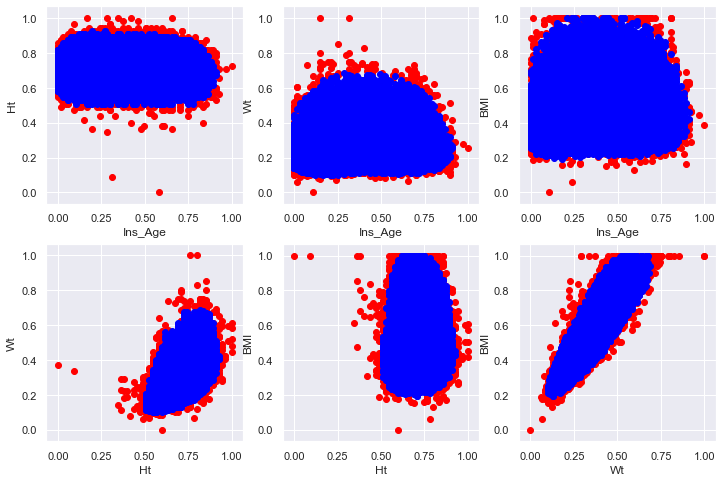

In [27]:
#  Постройм 6 графиков
from itertools import *

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (feature_x, feature_y) in enumerate(combinations(person_features, 2)):
    axes[i // 3][i % 3].scatter(x=sdata.iloc[np.where(labels == -1)[0]].loc[:, feature_x],
                                y=sdata.iloc[np.where(labels == -1)[0]].loc[:, feature_y], c='red')
    axes[i // 3][i % 3].scatter(x=sdata.iloc[np.where(labels == 1)[0]].loc[:, feature_x],
                                y=sdata.iloc[np.where(labels == 1)[0]].loc[:, feature_y], c='blue')
    axes[i // 3][i % 3].set_xlabel(feature_x)
    axes[i // 3][i % 3].set_xlabel(feature_x)
    axes[i // 3][i % 3].set_ylabel(feature_y)

Видим, что, во-первых, облака синие точки заполняют почти все облако точек, а во-вторых, красные точки находятся на границе или далеко от облака (интуитивно понятно, что это аномальные объекты). 

##### Непараметрическое восстановление плотности.
Искать аномалии можно, анализируя непараметрически восстановленную плотность одномерного распределения. Так можно заметить, что какие-то объекты выбиваются из общей тенденции. 

В seaborn это удобно делать с помощью метода distplot. Посмотрев на гистограммы в начале ноутбука, выберем для ближайшего рассмотрения признаки BMI, Employment_Info_1, Medical_History_32. 

Примените метод distplot к этим трем признакам, указав bins=50. Рекомендуется удалять значения nan с помощью метода датафрейма .dropna().

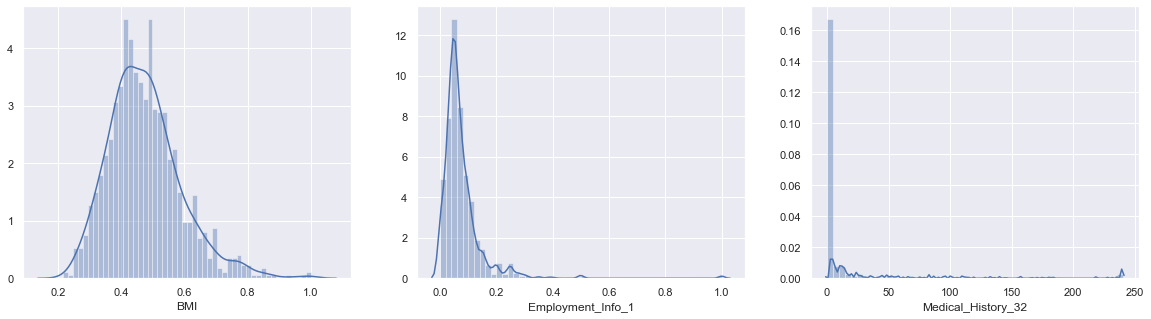

In [29]:
# Восстановите плотности трех для трех указанных признаков
sel_features = ['BMI', 'Employment_Info_1', 'Medical_History_32']
sel_data_dropna = data[sel_features].dropna()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, feature in enumerate(sel_features):
    sns.distplot(sel_data_dropna[feature], bins=50, ax=axes[i])

На трех графиках видно, что в конце множества значений признака есть скачок, и это явление очень похоже на аномалию.

### Заключение
Мы познакомились с методами визуализации и отбора шумовых объектов и посмотрели на примере, с чего стоит начинать работу с новым датасетом. Как и в других методах анализа данных, в методах визуализации приходится подбирать параметры